
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---
  
# Análisis Estadístico de Datos - 2023

* **Profesor**: Diego Ravignani Guerrero
* **Prácticas**: Carmina Pérez Bertolli



---
---
## Trabajo Práctico 5 - Estimación de Intervalos
---
---

Considerar $n=32$ lanzamientos de una moneda cargada con probabilidad $p$ de salir cara. El numero de caras $X$ es una variable aleatoria con distribucion binomial $X \sim B(n, p)$. Considerar
un tanda de lanzamientos en el que salen $k$ caras. El estimador del
parametro $p$ es $\hat{p} = \frac{k}{n}$. El intervalo de confianza estándar de $p$ con un nivel de confianza del $95\%$ es $\hat{p} \pm 1.96\sqrt{\hat{p}(1 − \hat{p})/n}$, donde $q = 1.96$ es el cuantil normal estandar para un $95\%$ CL.

  * Simular 10.000 tandas de lanzamientos asumiendo $p = 0.2$.

  * Verificar para cada tanda si el intervalo incluye o no a $p = 0.2$.

  * Estimar la cobertura del intervalo.

  * Decidir si el intervalo es exacto y comparar la cobertura con respecto al nivel de confianza.

  * Barrer $p$ en el intervalo [0,1] en pasos de $0.01$, graficar y ver si hay valores de $p$ para los cuáles la cobertura es particularmente mala.

  * Estimar la cobertura de un nuevo intervalo $t \pm 1.96 \sqrt{t(1 − t)/n}$ con $t = (k + 2)/(n + 2)$, equivalente a “agregar dos  aciertos y dos fracasos”.

---
### **Resolución**

Cobertura del intervalo estándar: 88.64%
Cobertura del intervalo ajustado: 94.81%


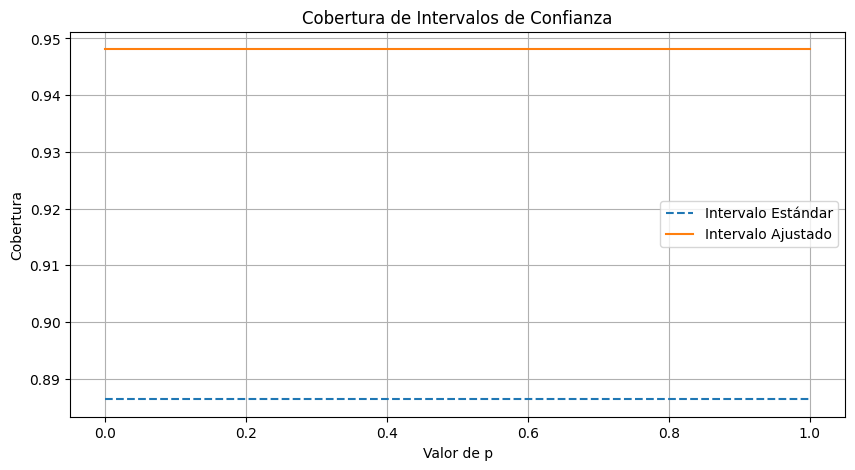

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
n_simulations = 10000
n_flips = 32
true_p = 0.2
confidence_level = 0.95
quantile = 1.96

# Inicialización de variables
coverage_standard = 0
coverage_adjusted = 0
p_values = np.arange(0, 1.01, 0.01)

for _ in range(n_simulations):
    # Simular una tanda de lanzamientos
    simulated_data = np.random.binomial(1, true_p, n_flips)

    # Calcular el número de caras
    k = np.sum(simulated_data)

    # Calcular el estimador de p
    hat_p = k / n_flips

    # Calcular el intervalo de confianza estándar
    lower_standard = hat_p - quantile * np.sqrt(hat_p * (1 - hat_p) / n_flips)
    upper_standard = hat_p + quantile * np.sqrt(hat_p * (1 - hat_p) / n_flips)

    # Verificar si el intervalo incluye a true_p
    if lower_standard <= true_p <= upper_standard:
        coverage_standard += 1

    # Calcular el intervalo de confianza ajustado
    t = (k + 2) / (n_flips + 2)
    lower_adjusted = t - quantile * np.sqrt(t * (1 - t) / n_flips)
    upper_adjusted = t + quantile * np.sqrt(t * (1 - t) / n_flips)

    # Verificar si el intervalo ajustado incluye a true_p
    if lower_adjusted <= true_p <= upper_adjusted:
        coverage_adjusted += 1

# Calcular la cobertura
coverage_standard /= n_simulations
coverage_adjusted /= n_simulations

print(f"Cobertura del intervalo estándar: {coverage_standard:.2%}")
print(f"Cobertura del intervalo ajustado: {coverage_adjusted:.2%}")

# Gráfico de la cobertura en función de p
plt.figure(figsize=(10, 5))
plt.plot(p_values, [coverage_standard] * len(p_values), label="Intervalo Estándar", linestyle='--')
plt.plot(p_values, [coverage_adjusted] * len(p_values), label="Intervalo Ajustado")
plt.xlabel("Valor de p")
plt.ylabel("Cobertura")
plt.legend()
plt.title("Cobertura de Intervalos de Confianza")
plt.grid(True)
plt.show()
